# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 06.10.2021

Мягкий дедлайн: 23:59MSK 25.10.2021

Жесткий дедлайн: 23:59MSK 28.10.2021

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [2]:
import torch
from torch import nn, optim
import pandas as pd
import numpy as np
import random
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [3]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2021-10-26 12:08:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: ‘data.txt.zip’

data.txt.zip        100%[===================>] 201.24M  55.9MB/s    in 3.9s    

2021-10-26 12:08:07 (51.1 MB/s) - ‘data.txt.zip’ saved [211011981/211011981]



In [4]:
df = pd.read_csv('data.txt.zip', header=None)

In [5]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [6]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [7]:
rg = Ridge(alpha = 3.0)
rg.fit(X_train, y_train)
pred = rg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))

In [8]:
rmse

9.510160719143046

In [9]:
const = np.mean(y_train)

In [10]:
y_train_const = np.full(y_train.shape, const)

In [11]:
rgc = Ridge(alpha = 3.0)
rgc.fit(X_train, y_train_const)
pred_const = rgc.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_const))


In [12]:
rmse

10.852463905136355

## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [13]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

In [14]:
class ForDataLoader(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return [torch.tensor(self.x[idx, :], dtype=torch.float), torch.tensor(self.y[idx], dtype=torch.float)]

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st = StandardScaler()
X_train = st.fit_transform(X_train)

In [17]:
X_test = st.transform(X_test)

In [18]:
yts = StandardScaler()

In [19]:
y_train_n = yts.fit_transform(y_train.reshape(-1,1))

In [20]:
y_test_n = yts.transform(y_test.reshape(-1,1))

In [21]:
model = nn.Sequential(
    nn.Linear(90, 300),
    nn.BatchNorm1d(300),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(300, 150),
    nn.BatchNorm1d(150),
    nn.LeakyReLU(),
    nn.Dropout(0.2),
    nn.Linear(150, 90),
    nn.BatchNorm1d(90),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(90, 50),
    nn.BatchNorm1d(50),
    nn.LeakyReLU(),
    nn.Dropout(0.2),
    nn.Linear(50, 1)
)

In [22]:
train_set = ForDataLoader(X_train,y_train_n)
train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=50,
    shuffle=True, 
    num_workers=1
)
test_set = ForDataLoader(X_test,y_test_n)
test_loader = torch.utils.data.DataLoader(
    test_set, 
    batch_size=50,
    shuffle=False, 
    num_workers=1
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.000020112)

In [23]:
from IPython.display import clear_output

In [24]:
def plot_history(train_history, val_history, title="loss"):
    plt.figure(figsize=(15,15))
    plt.title('{}'.format(title))
    plt.plot(train_history, label="train", zorder=1)
    
    points = np.sqrt(np.array(val_history))
    steps = list(range(0, len(train_history) + 1, int(len(train_history) / len(val_history))))[1:]
    
    plt.scatter(steps, np.sqrt(val_history), marker='+', s=180, c="orange", label="val", zorder=2)
    plt.xlabel("train steps")
    
    plt.legend(loc="best")
    plt.grid()

    plt.show()

In [25]:
def train(model, optimizer, criterion, train_loader, test_loader, epoches):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    '''
    train_log_loss, val_loss_log = [], []
    for epoch in range(epoches):
      model.train()
      for x, y in tqdm(train_loader):
        y_pred = model(x)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_log_loss.append(loss.data)
   # Валидация
      test_epoch_loss = torch.empty(0)
      model.eval()
      with torch.no_grad():
        for x,y in tqdm(test_loader):
          pred = model(x)
          loss = criterion(pred, y)
          test_epoch_loss = torch.cat((test_epoch_loss, loss.unsqueeze(0)))
      val_loss_log.append(test_epoch_loss.mean())
      clear_output()
      plot_history(train_log_loss, val_loss_log, "loss")
      print('train loss ',torch.sqrt(train_log_loss[-1]))
      print('val loss ',torch.sqrt(val_loss_log[-1]))
def test(model, criterion, test_loader):
    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects '''
    test_loss = 0
    test_size = 0
    test_loss_log = []   
    model.eval()
    with torch.no_grad():
      for x,y in tqdm(test_loader):
        pred = model(x)
        loss = criterion(pred,y)
        test_loss += loss.item()
        test_size += pred.size(0)
    test_loss_log.append(test_loss / test_size)
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    predicts = torch.ones(len(test_loader.dataset))
    return predicts

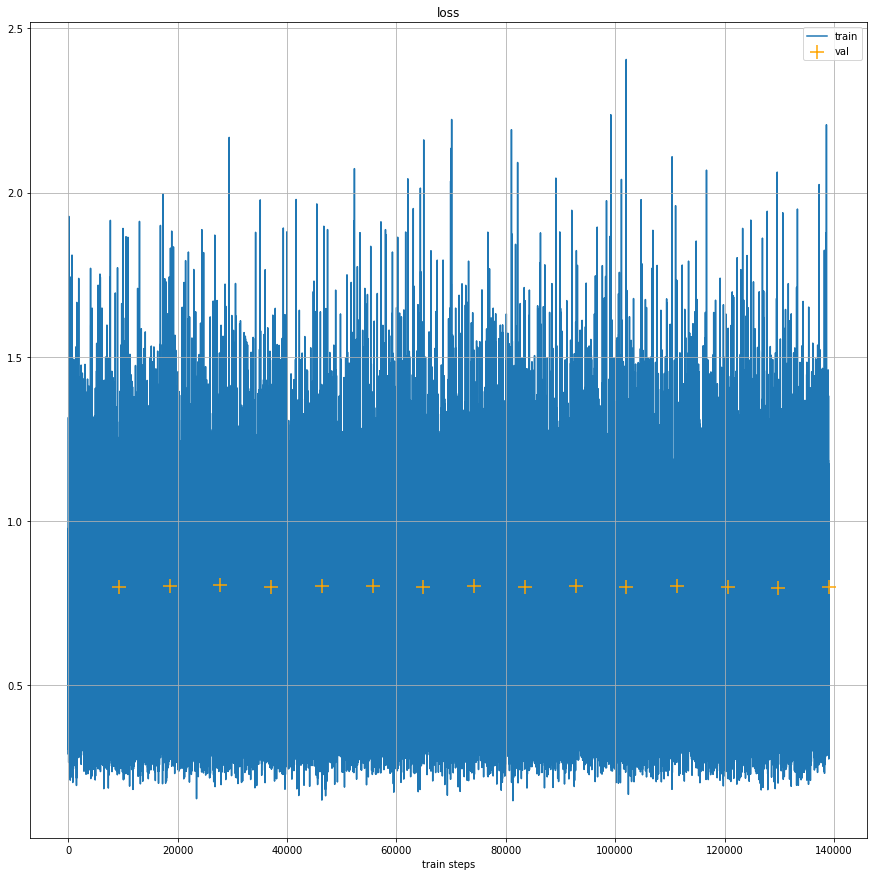

train loss  tensor(0.5778)
val loss  tensor(0.7973)


In [ ]:
set_random_seed(1)
train(model,optimizer, criterion,train_loader,test_loader, 15)

In [ ]:
x = model(torch.tensor(X_test).float()).detach().numpy() 

In [ ]:
y_pred = yts.inverse_transform(x)

In [ ]:
result_loss = np.sqrt(mean_squared_error(y_pred,y_test))

In [ ]:
print(result_loss)

8.723424218404672


In [27]:
assert test(model, criterion, test_loader).shape[0] == y_test.shape[0]

  0%|          | 0/1033 [00:00<?, ?it/s]

## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

Я использовал полносвязную нейронную сеть. Модель состоит из линейных слоев и функций активации RELU, LeakyRelu, а также нормализации BatchNorm, для улушения скорости работы нейронной сети, и Dropout, позволяющий избежать переобучения модели. Было необходимо стандартизовать данные, в том числе и целевую переменную, для того чтобы критерий ошибки модели быстрее достигал минимума. Опытным путем было установлено, что оптимизатор adaptive moment estimation, который очетает в себе и идею накопления движения и идею более слабого обновления весов для типичных признаков, засчет чего удается уменьшить колебания. В результате, оптимизация проходит быстрее. Гиперпараметрами являются: количество эпох обучения, шаг оптимизатора, размер батчей, а также гиперпараметры в модели.
1. Гиперпараметры модели:
  - линейный слой:
     а) первый линеййный слой принимал в себя количество признаков (90), на выходе гиперпараметром являлось желаемое количесво нейронов на выходе. Было установлено, что их количество в пределах  300 улучшает качесво модели (не очень много, но больше, чем признаков). Остальные линейные слои по нисходящей постепенно уменьшали количество нейронов до 1 (поскольку на выходе нам надо получить число, предсказывающее год создания песни);
  - гиперпараметр Dropout :
  доля нейронной сети в данном слое, которую мы отключаем для избежания переобучения.
  - гиперпараметр BatchNorm:
   принимал количество признаков текущего слоя, подбирался равным желаемым выходным сетям;
2. Шаг оптимизатора:
  гиперпараметр укзывает как сильно нужно продвинться в направлении антиградиента для нахождения минимума критерия ошибки модели. Эксперементально было установлено, что он должен находиться в пределах  (0.00003, 0.00001). Тогда мы не проскакиваем минимум, но итераций хватает, чтобы максимально приблизиться к нему;
3. Количество эпох обучения:
  необходима для подстройки модели под данные, так как веса нейронной сети изменяются все большее количество раз. Если будет недостаточно эпох, то модель недообучится, если слишком много, то переобучится;
4. размер батча:
  разбиение на батчи  полезно потому, что при обработке каждого батча выполняется алгоритм обратного распространения ошибки и веса корректируются с целью минимизации этой самой ошибки. Чем больше батчей, тем лучше обучится модель, однако дольше будет выполянться алгоритм. Каждый раз нейронная сеть немного оптимизируется, полезные закономерности сохраняются, а запоминание, возникающее например при пропуске всего датасета через модель, уходит.
  

In [41]:
# Эксперемент 1:
 # размер шага
train_set = ForDataLoader(X_train,y_train_n)
train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=50,
    shuffle=True, 
    num_workers=1
)
test_set = ForDataLoader(X_test,y_test_n)
test_loader = torch.utils.data.DataLoader(
    test_set, 
    batch_size=50,
    shuffle=False, 
    num_workers=1
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 2)

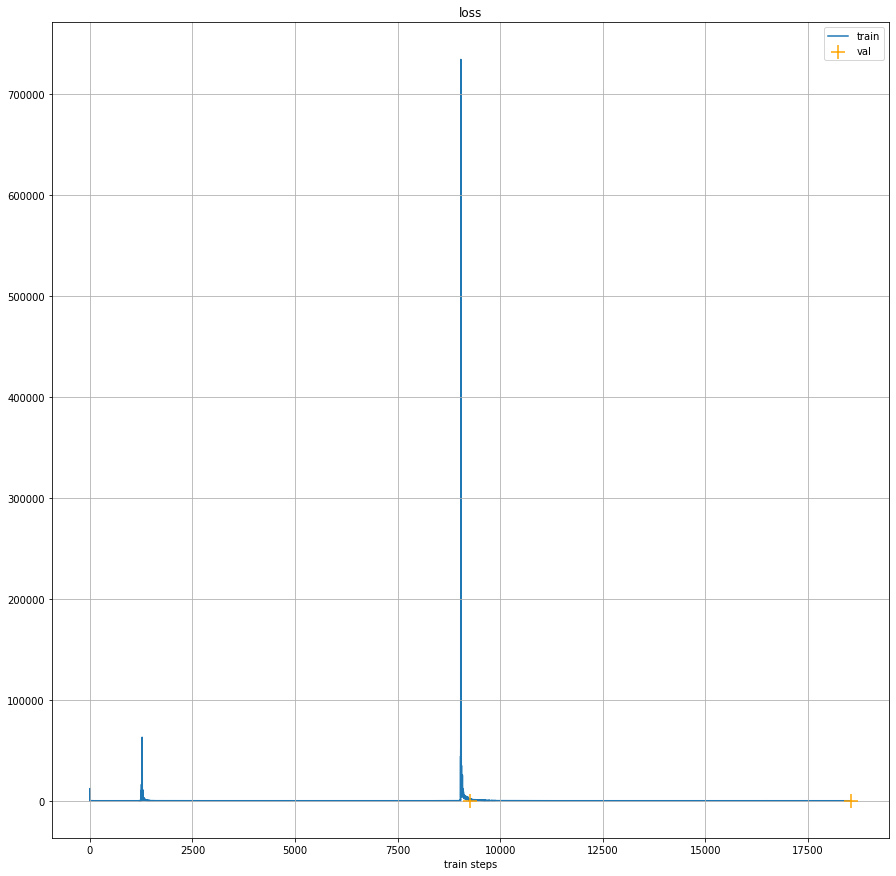

train loss  tensor(1.3181)
val loss  tensor(1.8691)


In [42]:
set_random_seed(1)
train(model,optimizer, criterion,train_loader,test_loader, 2)

In [43]:
x = model(torch.tensor(X_test).float()).detach().numpy() 
y_pred = yts.inverse_transform(x)
result_loss = np.sqrt(mean_squared_error(y_pred,y_test))
result_loss

20.448616377067854

Как видно из графика, при таком большом шаге происходят сильные асцилляции из - за чего оптимизатор не может достичь минимума.

In [32]:
# Эксперемент 2:
 # отсутствие BatchNorm и Dropout
model = nn.Sequential(
    nn.Linear(90, 300),
    nn.ReLU(),
    nn.Linear(300, 150),
    nn.LeakyReLU(),
    nn.Linear(150, 90),
    nn.ReLU(),
    nn.Linear(90, 50),
    nn.LeakyReLU(),
    nn.Linear(50, 1)
)

In [34]:
train_set = ForDataLoader(X_train,y_train_n)
train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=50,
    shuffle=True, 
    num_workers=1
)
test_set = ForDataLoader(X_test,y_test_n)
test_loader = torch.utils.data.DataLoader(
    test_set, 
    batch_size=50,
    shuffle=False, 
    num_workers=1
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.002)

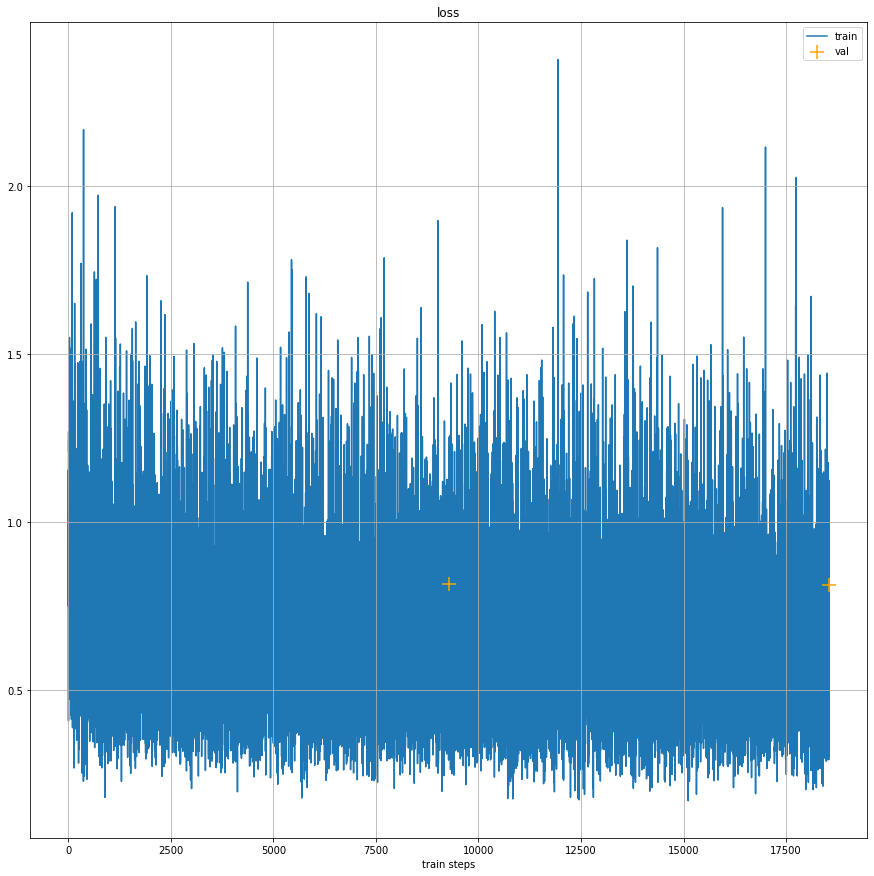

train loss  tensor(0.5415)
val loss  tensor(0.8117)


In [35]:
set_random_seed(1)
train(model,optimizer, criterion,train_loader,test_loader, 2)

In [36]:
x = model(torch.tensor(X_test).float()).detach().numpy() 
y_pred = yts.inverse_transform(x)
result_loss = np.sqrt(mean_squared_error(y_pred,y_test))
result_loss

8.88093969491199

Как видно из результатов, несмотря на достаточно маленьку ошибку на трейне, ошибка на валидации и на тесте гораздо хуже финальной модели => модель переобучилась (хотя не очень сильно).Кроме того, без BatchNorm, оптимизация проходит медленнее.

In [37]:
#Эксперимент 3
# Увеличение размера батча
model = nn.Sequential(
    nn.Linear(90, 300),
    nn.BatchNorm1d(300),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(300, 150),
    nn.BatchNorm1d(150),
    nn.LeakyReLU(),
    nn.Dropout(0.2),
    nn.Linear(150, 90),
    nn.BatchNorm1d(90),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(90, 50),
    nn.BatchNorm1d(50),
    nn.LeakyReLU(),
    nn.Dropout(0.2),
    nn.Linear(50, 1)
)
train_set = ForDataLoader(X_train,y_train_n)
train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=train_size,
    shuffle=True, 
    num_workers=1
)
test_set = ForDataLoader(X_test,y_test_n)
test_loader = torch.utils.data.DataLoader(
    test_set, 
    batch_size=50,
    shuffle=False, 
    num_workers=1
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.020112)

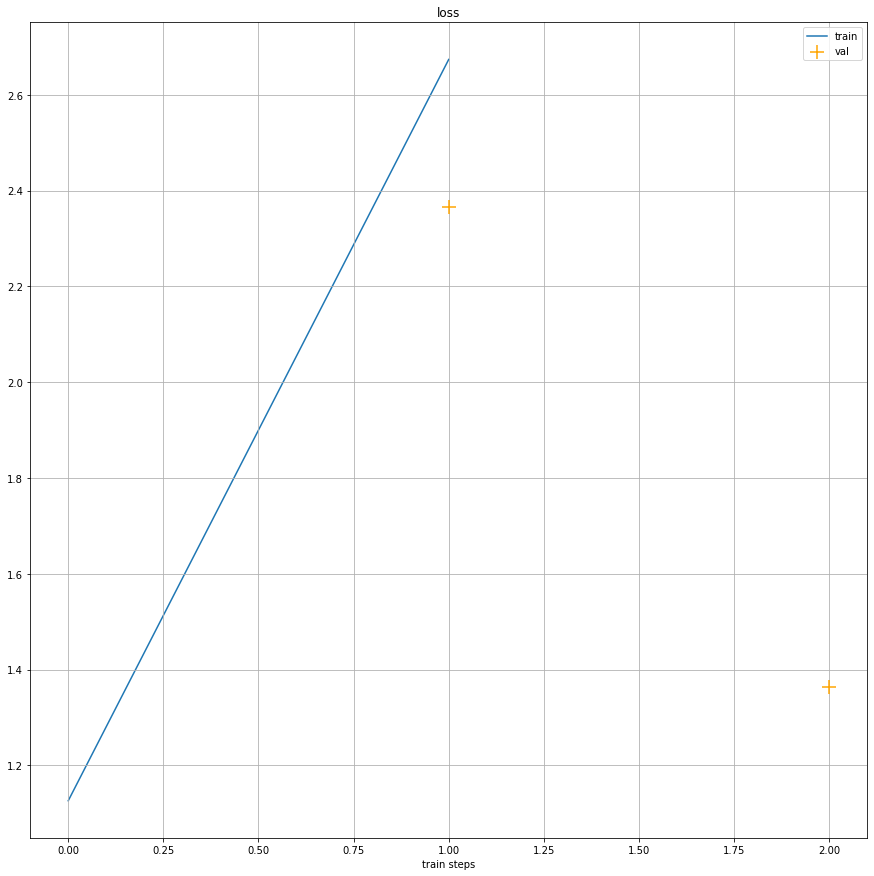

train loss  tensor(1.6352)
val loss  tensor(1.3647)


In [38]:
set_random_seed(1)
train(model,optimizer, criterion,train_loader,test_loader, 2)

In [39]:
x = model(torch.tensor(X_test).float()).detach().numpy() 
y_pred = yts.inverse_transform(x)
result_loss = np.sqrt(mean_squared_error(y_pred,y_test))
result_loss

14.9312376927699

Тренировка модели на батче, равному всей выборке из трейна приводит, как ожидалось, к недообучению.